In [55]:
import pandas as pd
from pandas import to_datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import gc

In [2]:
col_types = ['startstationid':'category','startstationname':'category','endstationid':'category','endstationname':'category','bikeid':'category']

rides_raw = pd.read_csv('data/NY_2019.csv',
                    index_col=False,
                    parse_dates=['starttime','stoptime'],
                    usecols=['starttime','stoptime','startstationid','startstationname','endstationid','endstationname','bikeid'],
                    dtype=col_types)

rides_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20551697 entries, 0 to 20551696
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   starttime         datetime64[ns]
 1   stoptime          datetime64[ns]
 2   startstationid    float64       
 3   startstationname  object        
 4   endstationid      float64       
 5   endstationname    object        
 6   bikeid            int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 1.1+ GB


In [67]:
pd.DataFrame.from_records([(col, rides_raw[col].nunique(), rides_raw[col].dtype, rides_raw[col].memory_usage(deep=True) )  for col in rides_raw.columns],
  columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,starttime,20539444,datetime64[ns],164413704
1,stoptime,20539225,datetime64[ns],164413704
2,startstationid,936,float64,164413704
3,startstationname,938,object,1574199724
4,endstationid,973,float64,164413704
5,endstationname,976,object,1573922082
6,bikeid,19571,int64,164413704


In [3]:
rides_raw.head()

,starttime,stoptime,startstationid,startstationname,endstationid,endstationname,bikeid
0,2019-01-01 00:01:47.401,2019-01-01 00:07:07.581,3160.0,Central Park West & W 76 St,3283.0,W 89 St & Columbus Ave,15839
1,2019-01-01 00:04:43.736,2019-01-01 00:10:00.608,519.0,Pershing Square North,518.0,E 39 St & 2 Ave,32723
2,2019-01-01 00:06:03.997,2019-01-01 00:15:55.438,3171.0,Amsterdam Ave & W 82 St,3154.0,E 77 St & 3 Ave,27451
3,2019-01-01 00:07:03.545,2019-01-01 00:52:22.650,504.0,1 Ave & E 16 St,3709.0,W 15 St & 6 Ave,21579
4,2019-01-01 00:07:35.945,2019-01-01 00:12:39.502,229.0,Great Jones St,503.0,E 20 St & Park Ave,35379


In [12]:
rides = rides_raw.sort_values(by=['bikeid','starttime'])
offset = pd.DataFrame({'starttime':pd.to_datetime('2010-09-01'),'startstationid':0,'stoptime':pd.to_datetime('2010-09-01'),'endstationid':0,'bikeid':0},index=[0])
rides1 = pd.concat([offset,rides]).reset_index(drop=True).rename(columns={'bikeid':'bikeid1'})
rides2 = pd.concat([rides,offset]).reset_index(drop=True).rename(columns={'bikeid':'bikeid2'})
rides = pd.concat([rides1[['bikeid1','stoptime','endstationid','endstationname']],
                   rides2[['bikeid2','starttime','startstationid','startstationname']]],axis=1)

del [[offset,rides1,rides2]]
gc.collect()

rides.head(10)

,bikeid1,stoptime,endstationid,endstationname,bikeid2,starttime,startstationid,startstationname
0,0,2010-09-01 00:00:00.000,0.0,NaN,14529,2019-01-17 17:36:26.957,2005.0,Railroad Ave & Kay Ave
1,14529,2019-01-17 17:48:45.528,120.0,Lexington Ave & Classon Ave,14529,2019-01-19 20:15:20.299,120.0,Lexington Ave & Classon Ave
2,14529,2019-01-19 20:22:01.710,3057.0,Kosciuszko St & Tompkins Ave,14529,2019-01-20 09:55:21.158,3057.0,Kosciuszko St & Tompkins Ave
3,14529,2019-01-20 10:01:22.824,344.0,Monroe St & Bedford Ave,14529,2019-01-20 13:53:00.088,344.0,Monroe St & Bedford Ave
4,14529,2019-01-20 14:00:13.861,3052.0,Lewis Ave & Madison St,14529,2019-01-21 09:24:23.890,3052.0,Lewis Ave & Madison St
5,14529,2019-01-21 09:29:47.381,3042.0,Fulton St & Utica Ave,14529,2019-01-23 18:31:55.040,3042.0,Fulton St & Utica Ave
6,14529,2019-01-23 18:37:44.936,3046.0,Marcus Garvey Blvd & Macon St,14529,2019-01-25 07:48:19.685,3046.0,Marcus Garvey Blvd & Macon St
7,14529,2019-01-25 07:53:28.076,437.0,Macon St & Nostrand Ave,14529,2019-01-25 21:12:31.278,437.0,Macon St & Nostrand Ave
8,14529,2019-01-25 21:15:05.697,3047.0,Halsey St & Tompkins Ave,14529,2019-01-28 08:46:49.380,3047.0,Halsey St & Tompkins Ave
9,14529,2019-01-28 09:02:57.431,313.0,Washington Ave & Park Ave,14529,2019-02-05 17:26:22.126,3055.0,Greene Ave & Nostrand Ave


In [15]:
rebal = rides[['bikeid1','stoptime','endstationid','endstationname','starttime','startstationid','startstationname']]\
        .loc[(rides.bikeid1==rides.bikeid2) & (rides.startstationid != rides.endstationid)]

rebal.reset_index(drop=True, inplace=True)

rebal.head()

,bikeid1,stoptime,endstationid,endstationname,starttime,startstationid,startstationname
0,14529,2019-01-28 09:02:57.431,313.0,Washington Ave & Park Ave,2019-02-05 17:26:22.126,3055.0,Greene Ave & Nostrand Ave
1,14529,2019-03-09 08:41:54.407,3290.0,E 89 St & York Ave,2019-03-12 12:19:24.601,391.0,Clark St & Henry St
2,14529,2019-03-24 19:25:11.245,539.0,Metropolitan Ave & Bedford Ave,2019-03-25 15:58:35.635,3129.0,Queens Plaza North & Crescent St
3,14529,2019-03-29 18:17:57.059,486.0,Broadway & W 29 St,2019-04-17 17:56:25.764,3418.0,Plaza St West & Flatbush Ave
4,14529,2019-04-19 09:35:15.227,127.0,Barrow St & Hudson St,2019-04-19 14:07:38.259,229.0,Great Jones St


In [66]:
print(rides.shape)
print(rebal.shape)
print('The ratio of rebalances to rides in 2019 is: ', rebal.shape[0]/rides.shape[0])

(20551698, 8)
(547287, 7)
The ratio of rebalances to rides in 2019 is:  0.026629770445244963


<AxesSubplot:title={'center':'Citi Bike Rebalancing [2019] To Stations'}, xlabel='Count_In', ylabel='Station'>

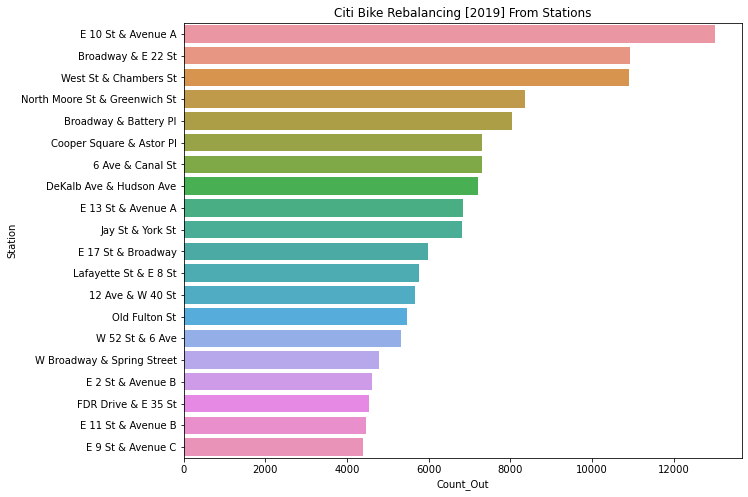

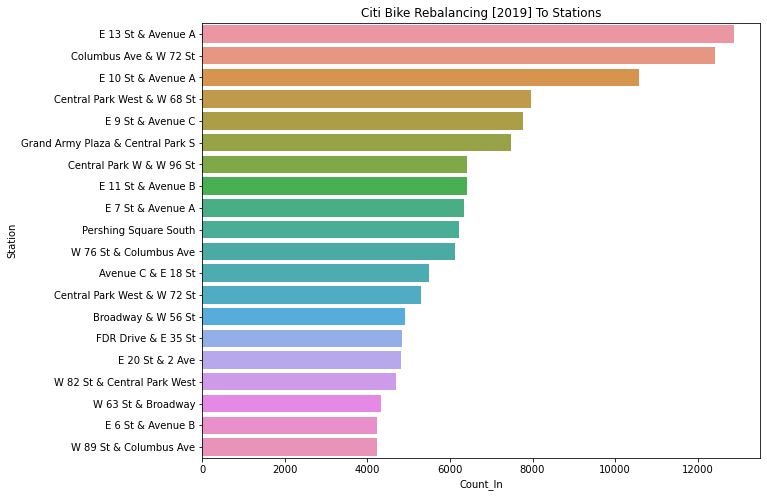

In [65]:
rebalout = rebal['endstationname'].value_counts().reset_index().rename(columns={'index':'Station','endstationname':'Count_Out'})[:20]
rebalin = rebal['startstationname'].value_counts().reset_index().rename(columns={'index':'Station','startstationname':'Count_In'})[:20]
# rebalout.head()
# rebalin.head()

plt.figure(figsize=(10,8))
plt.title('Citi Bike Rebalancing [2019] From Stations')
sns.barplot(y=rebalout.Station, x=rebalout.Count_Out, orient='h')

plt.figure(figsize=(10,8))
plt.title('Citi Bike Rebalancing [2019] To Stations')
sns.barplot(y=rebalin.Station, x=rebalin.Count_In, orient='h')